In [1]:
# This must be the only cell you import the package.
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import json
from collections import Counter
from matplotlib import pyplot as plt
import math
import numpy as np
from datetime import datetime

#WordCloud 
from wordcloud import WordCloud

#Regex
import re

#NLTK
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

#GENSIM
import gensim
from gensim.models import Phrases

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\slevi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\slevi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\slevi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Q1 all your answers to Q1 must be in this cell.

# Converts the JSON file to a csv file
def load_json(file_name):
    result=[]
    with open(file_name, 'r', encoding = "utf-8") as fp:
        line=fp.readline()
        while line:
            tobj = json.loads(line)
            
            # Gets all the user mentions from the JSON file
            mentions = tobj["entities"]["user_mentions"]
            
            # Sorts the user mentions by its screen name
            mention_list = sorted([m["screen_name"] for m in mentions])
            # Gets rid of duplicate mentions from mention_list
            newMention_list = []
            [newMention_list.append(x) for x in mention_list if x not in newMention_list]

            # Joins the mentions in newMention_list by a bar and replaces the '@' keyword with whitespace
            mentions_list = '|'.join(newMention_list).replace("@", "")
           
            # Gets all the hashtags from the JSON file
            hashtags = tobj["entities"]["hashtags"]
            
            # Sorts the hashtags by its text
            hashtag_list = sorted([h["text"] for h in hashtags])
            
            # Gets rid of duplicate hashtags from hashtag_list
            newHashtag_list = []
            [newHashtag_list.append(x) for x in hashtag_list if x not in newHashtag_list]
            
            # Joins the hashtags in newHashtag_list by a bar and replaces the '#' keyword with whitespace
            hashtags_list = '|'.join(newHashtag_list).replace("#", "")
            
            # Creates a dictionary containing the necessary information
            d = {
                "created_at": tobj["created_at"],
                "id_str": tobj["id_str"],
                "full_text": tobj["full_text"],
                "favorite_count": tobj["favorite_count"],
                "retweet_count": tobj["retweet_count"],
                "user_id_str": tobj["user"]["id_str"],
                "user_screen_name": tobj["user"]["screen_name"],
                "user_location": tobj["user"]["location"],
                "user_description": tobj["user"]["description"],
                "user_friends_count": tobj["user"]["friends_count"],
                "user_followers_count": tobj["user"]["followers_count"],
                "hashtags": hashtags_list,
                "mentions": mentions_list
            }
            
            # Appends the dictionary to a list
            result.append(d)
            line=fp.readline()
    return result

input_file="input.json"
data_list = load_json(input_file)

# Creates a dataframe from the function information and the given JSON file (input_file)
df = pd.DataFrame(data_list)

# Sorts the dataframe by its id_str
df1 = df.sort_values(by = 'id_str')
df1

# Saves the dataframe to a csv
#df1.to_csv("question1.csv", index = False)

,created_at,id_str,full_text,favorite_count,retweet_count,user_id_str,user_screen_name,user_location,user_description,user_friends_count,user_followers_count,hashtags,mentions
1808,Wed Jul 01 16:44:52 +0000 2020,1278368987600936962,RT @funder: Vote Biden. He’ll never side with ...,0,1900,971161855702913024,DougHarding7,"Mission Viejo, CA","Vote Blue America, Let’s hire Mark KellyAZ, Sa...",8180,7536,,funder
1615,Wed Jul 01 16:45:28 +0000 2020,1278369140542255106,Trump-Pence 2020 https://t.co/HAZGfdFMXf,0,0,48153855,umbr52643,PA,"I am Pro-Life, Pro-Peace.",1891,764,,
1961,Wed Jul 01 16:45:56 +0000 2020,1278369258037227521,@realDonaldTrump @NYCMayor Old racist man shak...,0,0,827877954965344256,KP23114,"Pennsylvania, USA",Midwife. Mother. Pissed. trump’s an asshole.,881,232,,NYCMayor|realDonaldTrump
1640,Wed Jul 01 16:45:59 +0000 2020,1278369267935657984,RT @brett_mcgurk: New WH explanation is absurd...,0,12287,275343068,victorialrudd,,,156,596,,brett_mcgurk
485,Wed Jul 01 16:46:00 +0000 2020,1278369275661529089,RT @joyce_tyler: @PoliticusSarah @wandainparis...,0,3,970577438,kmeeo,Colorado,"""The ignorance of one voter in a democracy imp...",14612,14488,,MollyJongFast|PoliticusSarah|TheRickWilson|joy...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,Wed Aug 12 11:45:51 +0000 2020,1293514027268804608,@realDonaldTrump WE ARE GOING TO WIN!,0,0,2295669925,christpaid4U,(United States) A RED STATE😉,"FEMALE, Married 2a💙LEO/LumbeeNativeAmerican, #...",2675,2107,,realDonaldTrump
2806,Wed Aug 12 11:45:59 +0000 2020,1293514063591374850,RT @paulcshipley: @realDonaldTrump @KamalaHarr...,0,489,2889535413,juststayinreal,,Nothing to see here.,1205,503,,KamalaHarris|paulcshipley|realDonaldTrump
2713,Wed Aug 12 11:46:30 +0000 2020,1293514193212235776,@realDonaldTrump https://t.co/nriNc93bYs,0,0,78664769,KushlasBySanaer,Hatton Garden London,#London 💚#Irish🧡 #Jeweller #Remain #HardLabour...,4999,3347,,realDonaldTrump
1817,Wed Aug 12 11:46:37 +0000 2020,1293514220122902528,"@realDonaldTrump Be scared, orange man. https:...",0,0,1046382063140687872,mapleapolis,,,191,150,,realDonaldTrump


                                location  tweet_count
user_location                                        
Texas, USA                    Texas, USA           35
Florida, USA                Florida, USA           30
California, USA          California, USA           29
New York, USA              New York, USA           14
Pennsylvania, USA      Pennsylvania, USA           13
North Carolina, USA  North Carolina, USA           12
San Diego, CA              San Diego, CA           12
Chicago, IL                  Chicago, IL           11
New York, NY                New York, NY           11
Los Angeles, CA          Los Angeles, CA           10


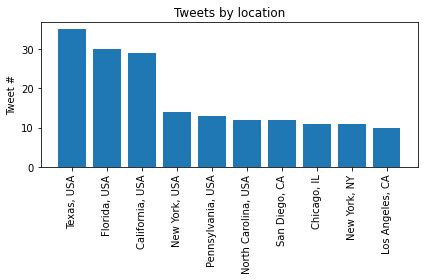

In [4]:
#Q2 all your answers to Q2 must be in this cell.

# Finds all the tweets that don't contain the given words
loc_df = df[~df["user_location"].isin(["", "United States", "USA"])]

# Group the tweets by its user location
group = loc_df.groupby(by = ["user_location"])
count_ser = group.user_location.count()
location_ser = group.user_location.first()

# Creates a dataframe with the user location and tweet count of each tweet 
location_df = pd.DataFrame(data = {"location": location_ser, "tweet_count": count_ser})

# Sorts the dataframe and gets the top 10 user locations from it 
df2 = location_df.sort_values(by = ["tweet_count", "location"], ascending = [False, True]).iloc[:10]
print(df2)
# Saves the dataframe to a csv
df2.to_csv("question2.csv", index = False)

# Gets the top 10 locations and tweet count and uses this to create the visualization
locations = df2["location"]
tweets = df2["tweet_count"]

# Creating the visualization
plt.bar(locations, tweets)
plt.xticks(rotation = 90)
plt.title("Tweets by location")
plt.ylabel("Tweet #")
plt.tight_layout()
plt.savefig("question2.png")

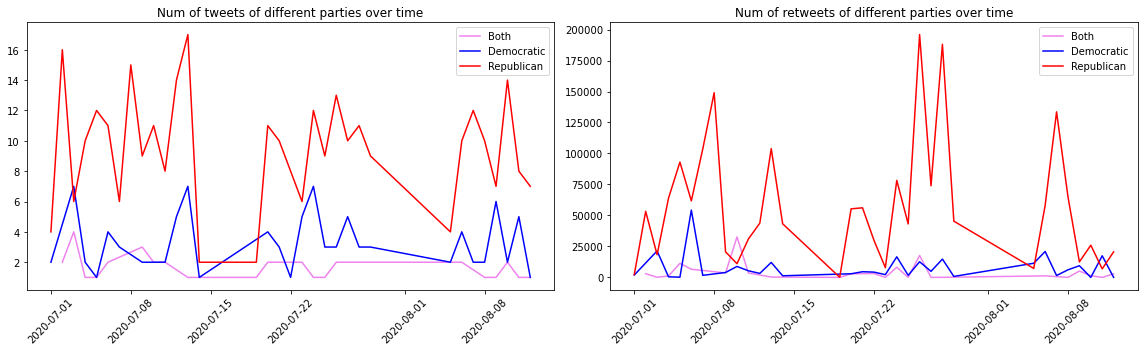

In [4]:
democratic_keywords = ["DNC", "TheDemocrats", "Biden", "JoeBiden", "Our best days still lie ahead", "No Malarkey!"]
republican_keywords = ["#MAGA2020", "#NovemberElection" ,"GOP", "Trump", "POTUS", "realDonaldTrump", "Pence", "Mike_Pence", "VP", "Keep America Great"]

# Initializes dem, rep, both, or none parties for each tweet 
def demRep(party_words):
    democrats = False
    republicans = False
    
    for dem in democratic_keywords:
        if dem in party_words:
            democrats = True
            break
            
    for rep in republican_keywords:
        if rep in party_words:
            republicans = True
            break
        
    if democrats and not republicans:
        return "Democratic"
    elif republicans and not democrats:
        return "Republican"
    elif democrats and republicans:
        return "Both"
    else:
        return "None"
    
df3_party = df.copy()
party_list = []

for val in df3_party["user_description"]:
    pval = demRep(val)
    party_list.append(pval)

df3_party["party"] = party_list

date = []
for d in df3_party['created_at']:
    date.append(pd.to_datetime(d).date())
df3_party['created_at_date'] = date

# Creating sub section containing democratic tweets
df_party = df3_party.loc[df3_party.party == 'Democratic']
group = df_party.groupby(by = ["created_at_date"])
tweet_ser_dem = group.created_at_date.count()
retweet_ser_dem = group.retweet_count.sum()
date_ser_dem = group.created_at_date.first()

# Creating sub section containing republican tweets
df_party = df3_party.loc[df3_party.party == 'Republican']
group = df_party.groupby(by = ["created_at_date"])
tweet_ser_rep = group.created_at_date.count()
retweet_ser_rep = group.retweet_count.sum()
date_ser_rep = group.created_at_date.first()

# Creating sub section containing both tweets
df_party = df3_party.loc[df3_party.party == 'Both']
group = df_party.groupby(by = ["created_at_date"])
tweet_ser_both = group.created_at_date.count()
retweet_ser_both = group.retweet_count.sum()
date_ser_both = group.created_at_date.first()

# Saving dataframe to a csv file
df3 = pd.DataFrame(data = {"date": date_ser_dem, "tweet_count": tweet_ser_dem, "retweet_count": retweet_ser_dem})
#df3.to_csv("question3.csv", index = False)

# Creating the visualizations
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
plt.plot(date_ser_both, tweet_ser_both, color = 'violet', label = 'Both')
plt.plot(date_ser_dem, tweet_ser_dem, color = 'b', label = 'Democratic')
plt.plot(date_ser_rep, tweet_ser_rep, color = 'r', label = 'Republican')
plt.xticks(rotation = 45)
plt.title("Num of tweets of different parties over time")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(date_ser_both, retweet_ser_both, color = 'violet', label = 'Both')
plt.plot(date_ser_dem, retweet_ser_dem, color = 'b', label = 'Democratic')
plt.plot(date_ser_rep, retweet_ser_rep, color = 'r', label = 'Republican')
plt.xticks(rotation = 45)
plt.title("Num of retweets of different parties over time")
plt.legend(loc = "best")
plt.tight_layout()
#plt.savefig("question3.png")

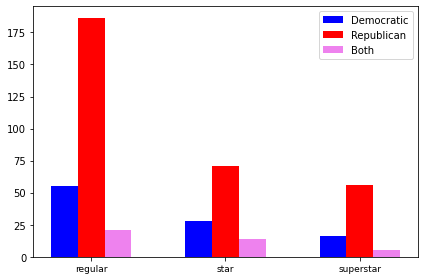

In [5]:
#Q4

df3_party.drop_duplicates(subset = ['user_id_str'], inplace = True)

# Gets a dataframe with all the parties 
def party_series(df_party):
    regular = df_party.loc[(df_party.user_followers_count <= 3000)]["user_followers_count"].count()
    star = df_party.loc[(df_party.user_followers_count > 3000) & (df.user_followers_count <= 10000)]["user_followers_count"].count()
    superstar = df_party.loc[(df_party.user_followers_count > 10000)]["user_followers_count"].count()
    party_series = [regular, star, superstar]
    return party_series

star_series = ["regular", "star", "superstar"]

# Locates all dems, reps, and both in the dataframe 
df_party_dem = df3_party.loc[df3_party.party == 'Democratic']
df_party_rep = df3_party.loc[df3_party.party == 'Republican']
df_party_both = df3_party.loc[df3_party.party == 'Both']

#Creates a dataframe with all the parties
df4 = pd.DataFrame(data = {"star": star_series})
df4["Democratic"] = party_series(df_party_dem)
df4["Republican"] = party_series(df_party_rep)
df4["Both"] = party_series(df_party_both)

# Saving dataframe to a csv file
# df4.to_csv("question4.csv", index = False)

# Creating the visualizations
plt.figure(figsize = (6, 4))
x_value = range(len(party_series(df_party_dem)))
width = 0.2

plt.bar([x - 1 * width for x in x_value], party_series(df_party_dem), width, color = 'blue', label = "Democratic")
plt.bar([x + 0 * width for x in x_value], party_series(df_party_rep), width, color = 'r', label = "Republican")
plt.bar([x + 1 * width for x in x_value], party_series(df_party_both), width, color = 'violet', label = "Both")

x_ticks = ["regular", "star", "superstar"]
plt.xticks(x_value, x_ticks, fontsize = 9)
plt.legend(loc = "best")
plt.tight_layout()
plt.savefig("question4.png")

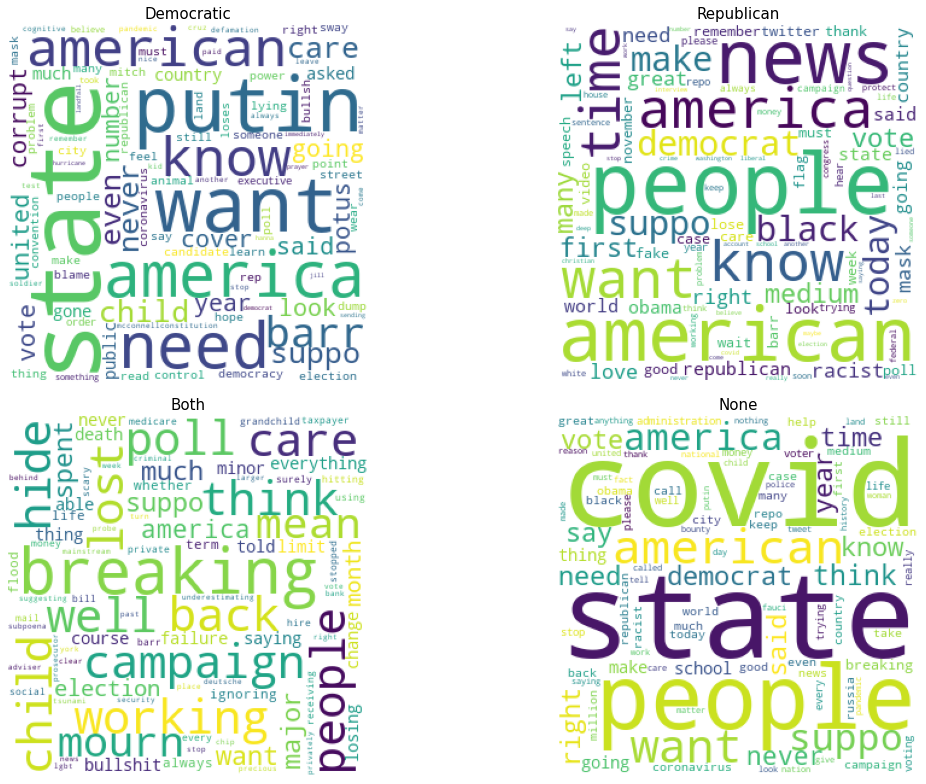

In [12]:
#Q5 all your answers to Q5 must be in this cell.

df5 = df3_party.copy()

# Converts the text to a list of tokens and removes unnecessary words
def text2tokens(text):
    text = text.lower()
    text = re.sub(r"http.+|@\w+|#\w+|rt|&\w|donald|trump|biden|president", " ", text.lower())
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 3]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

df5["tokens"] = df5.full_text.apply(text2tokens)

bigram = Phrases(df5.tokens, min_count = 5, delimiter = b' ')
bigrams = [bigram[d] for d in df5["tokens"]]
df5["bigrams"] = bigrams

df_party_dem = df5.loc[df5.party == 'Democratic']
df_party_rep = df5.loc[df5.party == 'Republican']
df_party_both = df5.loc[df5.party == 'Both']
df_party_none = df5.loc[df5.party == 'None']

#Gets the data frames for each party group
def wordCloud(df_party, party_name):
    
    words = []
    for bigrams in df_party.bigrams:
        words.extend(bigrams)
    counter = Counter(words)
    
    #print(counter)
    # Gets the top 100 most common words
    counter = counter.most_common(100)
    
    main_words = []
    main_count = []
    main_party = []
    for w, f in counter:
        #print("f = " + str(f))
        main_words.append(w)
        main_count.append(f)
        main_party.append(party_name)
        
    df_party = pd.DataFrame(data = {"keyword": main_words, "count": main_count, "party": main_party})
    new_df = df_party.sort_values(by = ["count"], ascending = [False])
    return new_df

dem_df = wordCloud(df_party_dem, "Democratic")
rep_df = wordCloud(df_party_rep, "Republican")
both_df = wordCloud(df_party_both, "Both")
none_df = wordCloud(df_party_none, "None")

# Concatenating all four dataframes into one data frame
df_array = [dem_df, rep_df, both_df, none_df]
final_df = pd.concat(df_array)

# Saves dataframe to a csv file
final_df.to_csv("question5.csv", index = False)

#Creating the word cloud visualizations
def displayWordCloud(x, y, z, keywords, title):
    plt.subplot(x, y, z)
    text = " ".join(keywords)

    wordcloud = WordCloud(width = 300, height = 300, background_color = "white", min_font_size = 5).generate(text)
    plt.title(title, fontsize = 15)
    plt.imshow(wordcloud)

# Plotting the visualizations
plt.figure(figsize = (18, 11))
displayWordCloud(2, 2, 1, dem_df["keyword"], "Democratic")
plt.axis('off')

displayWordCloud(2, 2, 2, rep_df["keyword"], "Republican")
plt.axis('off')

displayWordCloud(2, 2, 3, both_df["keyword"], "Both")
plt.axis('off')

displayWordCloud(2, 2, 4, none_df["keyword"], "None")
plt.axis('off')

plt.tight_layout()
# plt.savefig("question5.png")